<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Perceptron

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a single neuron neural network that constructs a linear decision surface.  The learned parameters are the weights (representing the slope) and the bias term representing the 'y-offset'.



<!-- ![perceptron](assets/perceptron.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron.jpg" height="300" width="500">

The perceptron implements the following equation:

<!-- ![perceptron](assets/perceptron-eq.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-eq.jpg" height="80" width="450">

If you have taken linear algebra you will recognize the line/plane representation as a dot product.  The ${\rm sign}$ function implements the activation function of the neuron,

${\rm sign}(x) = -1 \mbox{ if } x \le 0 \mbox{ else } 1$

The symbol $\hat{f}$ denotes the neural network model.

Training a perceptron is a simple search:

<!-- ![perceptron](assets/perceptron-train.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-train.jpg"  height="250" width="280">

More precisely, this is a directed stochastic search in that the `Update` step uses the *normal vector* $\bar{w}$ of the decision surface $\bar{w} \bullet \bar{x} + b$ as a guide in order to modify $\bar{w}$ and $\bar{b}$.

## Demo - The Perceptron

Perceptron learning a decision surface.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-search.png"  height="400" width="500">

## Building a Perceptron

Let's build a perceptron using Sci-Kit Learn.

In [1]:
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [2]:
# prepare our data - just grab the two independent variables from the Iris dataset that mattered
# in addition to the target.
iris_df = pandas.read_csv("https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/iris.csv")
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]

# The perceptron can only deal with two labels at a 
# time so drop one of them: virginica
model_df = shrink_df[shrink_df.Species != 'virginica']

# feature matrix and target vector
model_features_df = model_df[['Petal.Length','Petal.Width']]
# neural networks can only deal with numerical target values,
# recode the labels as numerical values
f = (lambda x: 1 if x == 'setosa' else -1)
model_target_df = model_df['Species'].apply(f)

In [3]:
# build and fit the perceptron model
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(model_features_df, model_target_df)

# model accuracy
predict_array = model.predict(model_features_df)      # produces an array of labels
predicted_values = pandas.DataFrame(predict_array)  # turn it into a DF
predicted_values.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {:3.2f}".format(accuracy_score(model_target_df, predicted_values)))

Our model accuracy is: 1.00


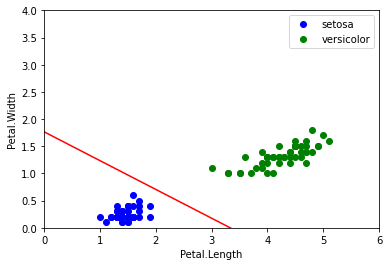

In [4]:
# compute the model in terms that we can plot
slope = - model.coef_[0][0]/model.coef_[0][1]
offset = - model.intercept_[0]/model.coef_[0][1]

# scatter plot of the data
plt.plot(model_df['Petal.Length'][model_df.Species == 'setosa'],
         model_df['Petal.Width'][model_df.Species == 'setosa'],
         'bo')
plt.plot(model_df['Petal.Length'][model_df.Species == 'versicolor'],
         model_df['Petal.Width'][model_df.Species == 'versicolor'],
         'go')
plt.axis([0, 6, 0, 4])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor'])

# plot the model
x_ticks = [0,6]
y_ticks = [slope * i + offset for i in x_ticks]
plt.plot(x_ticks,y_ticks,"r-")
plt.show()

As expected, we see that the model perfectly separates the two classes.